In [90]:
# Notebook Size

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [21]:
# Display all data when printing df

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [224]:
# Download Plots - High resolution

# plt.savefig('/Users/ahmad/Downloads/name', dpi=300)

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Control Site Plot over 14 days:

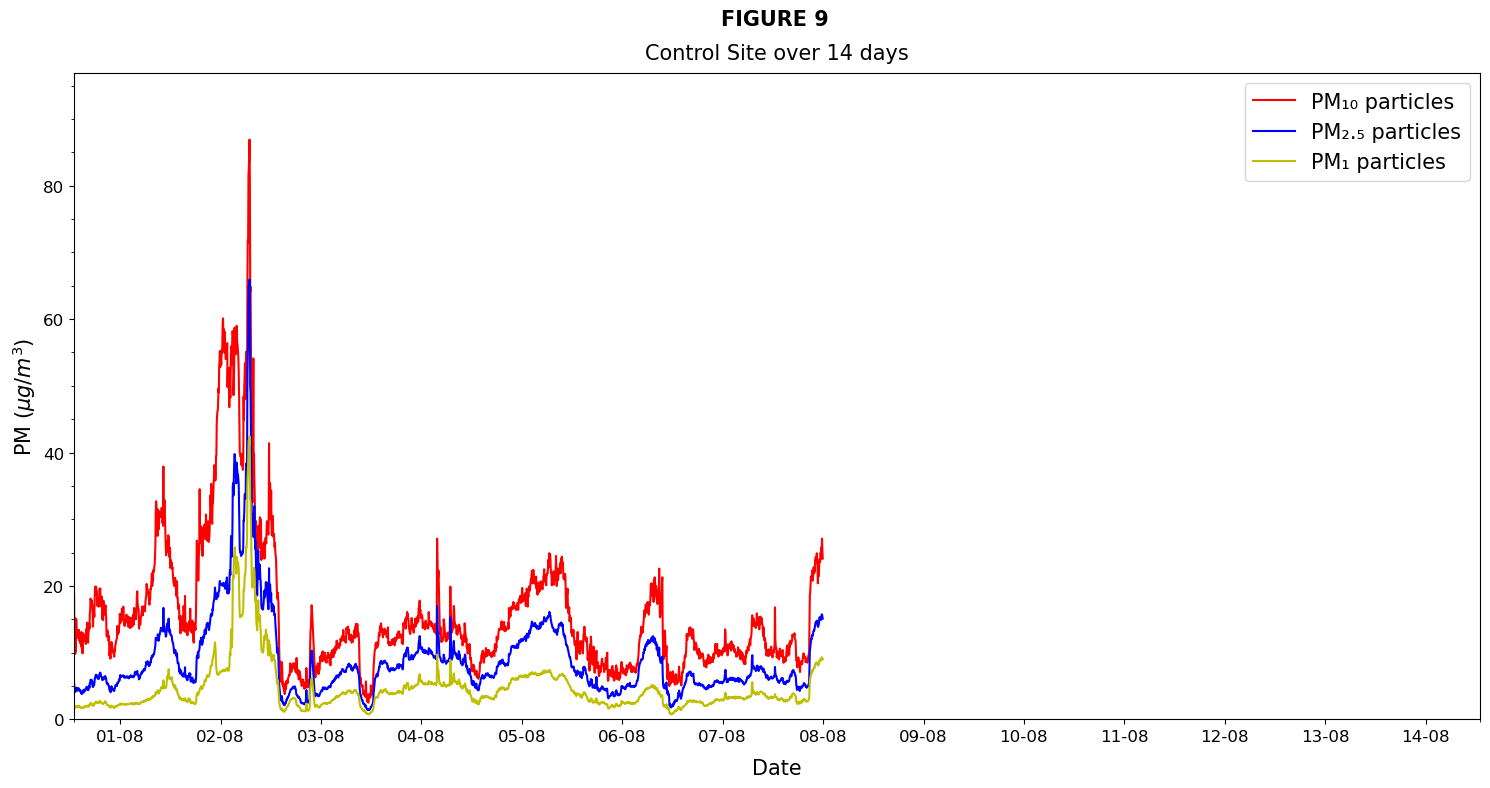

In [216]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

#print(combined_df['Date Time'])

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

plt.figure(figsize=(15, 8))

# Plot the combined data
plt.plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
plt.plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
plt.plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")

# Axis Labels
plt.title('Control Site over 14 days', fontsize=15, pad=10)
plt.suptitle('FIGURE 9', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# x & y axis limits to zoom in on the data
plt.xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=14))
plt.ylim(0, combined_df[['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']].max().max() + 10)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1000))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_9', dpi=300)

plt.tight_layout()
plt.show()

<strong>Fig9:</strong> Plot of control Site in Brunel University over 14 days (Full 14 days not collected yet)

# Test Site Plot over 14 days:

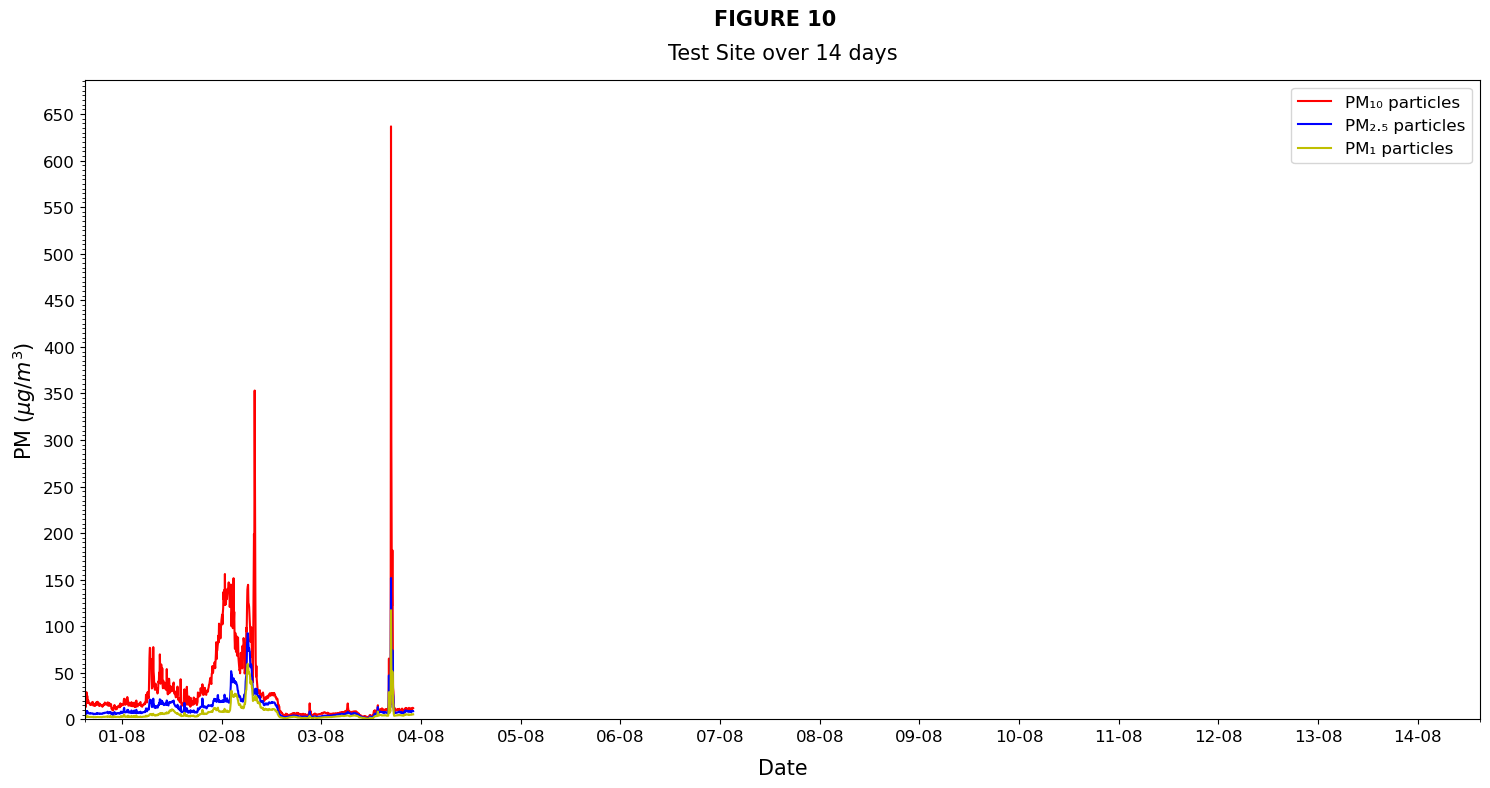

In [199]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

#print(combined_df['Date Time'])

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

plt.figure(figsize=(15, 8))

# Plot the combined data
plt.plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
plt.plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
plt.plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")

# Axis Labels
plt.title('Test Site over 14 days', fontsize=15, pad=15)
plt.suptitle('FIGURE 10', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# x & y axis limits to zoom in on the data
plt.xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=14))
plt.ylim(0, combined_df[['PM10 particles (ug/m^3)', 'PM2.5 particles (ug/m^3)', 'PM1 particles (ug/m^3)']].max().max() + 50)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1000))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_10', dpi=300)

plt.tight_layout()
plt.show()

<strong> Fig10:</strong>  Plot of Test Site in West Drayton over 14 days (Full 14 days not collected yet)

# PM10 Control vs Test Site:

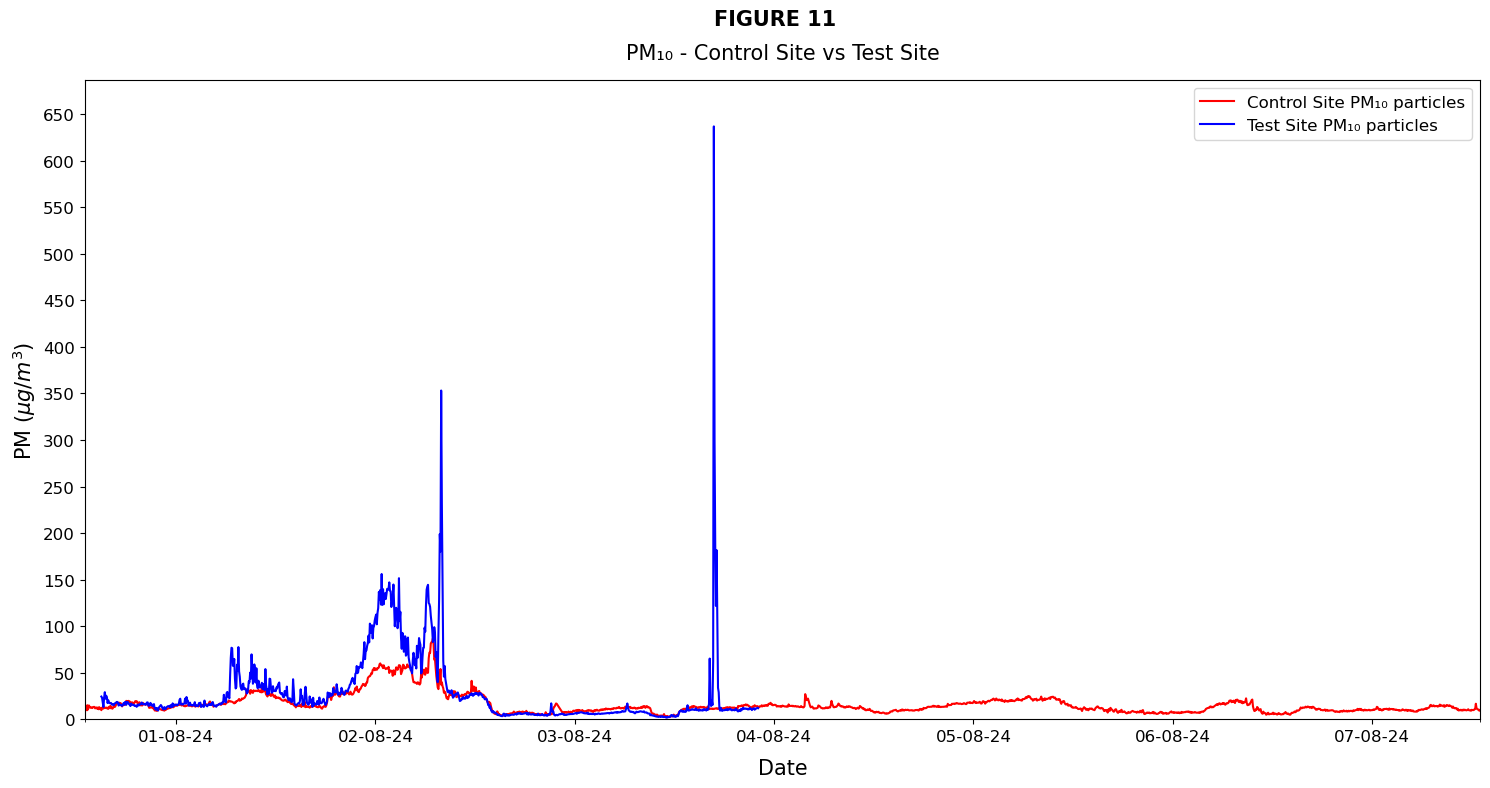

In [219]:
folder_paths = [
    '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site',
    '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site'
]

# Separate dataframes for each directory
dfs = {folder_paths[0]: [], folder_paths[1]: []}

# Loop through all folders and subfolders
for folder_path in folder_paths:
    #print(f"Checking folder: {folder_path}")  # Debugging statement
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.xlsx'):
                file_path = os.path.join(root, file_name)
                #print(f"Reading file: {file_path}")  # Debugging statement
                df = pd.read_excel(file_path, engine='openpyxl')
                df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
                dfs[folder_path].append(df)
                #print(f"DataFrame shape: {df.shape}")

# Combine all dataframes for each directory
combined_dfs = {}
for folder_path in folder_paths:
    combined_dfs[folder_path] = pd.concat(dfs[folder_path], ignore_index=True)
    #print(f"Combined DataFrame shape for {folder_path}: {combined_dfs[folder_path].shape}")

    # Drop rows with invalid dates and remove duplicates
    combined_dfs[folder_path] = combined_dfs[folder_path].dropna(subset=['Date Time'])
    combined_dfs[folder_path] = combined_dfs[folder_path].drop_duplicates(subset=['Date Time'])

    # Sort by date
    combined_dfs[folder_path] = combined_dfs[folder_path].sort_values(by='Date Time')

# Plot the data
plt.figure(figsize=(15, 8))

# Plot Control Site
plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM10 particles (ug/m^3)'], label='Control Site PM₁₀ particles', color="r")
#plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM2.5 particles (ug/m^3)'], label='Control Site PM₂.₅ particles', color="b")
#plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM1 particles (ug/m^3)'], label='Control Site PM₁ particles', color="y")

# Plot Test Site
plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM10 particles (ug/m^3)'], label='Test Site PM₁₀ particles', color="b")
#plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM2.5 particles (ug/m^3)'], label='Test Site PM₂.₅ particles', color="c")
#plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM1 particles (ug/m^3)'], label='Test Site PM₁ particles', color="m")

# Axis Labels
plt.title('PM₁₀ - Control Site vs Test Site', fontsize=15, pad=15)
plt.suptitle('FIGURE 11', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# x & y axis limits to zoom in on the data
plt.xlim(min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()),
         min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()) + pd.Timedelta(days=7))
plt.ylim(0, max(combined_dfs[folder_paths[0]]['PM10 particles (ug/m^3)'].max(), combined_dfs[folder_paths[1]]['PM10 particles (ug/m^3)'].max()) + 50)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1000))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10000))

# plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_11', dpi=300)

plt.tight_layout()
plt.show()

# PM2.5 Control vs Test Site:

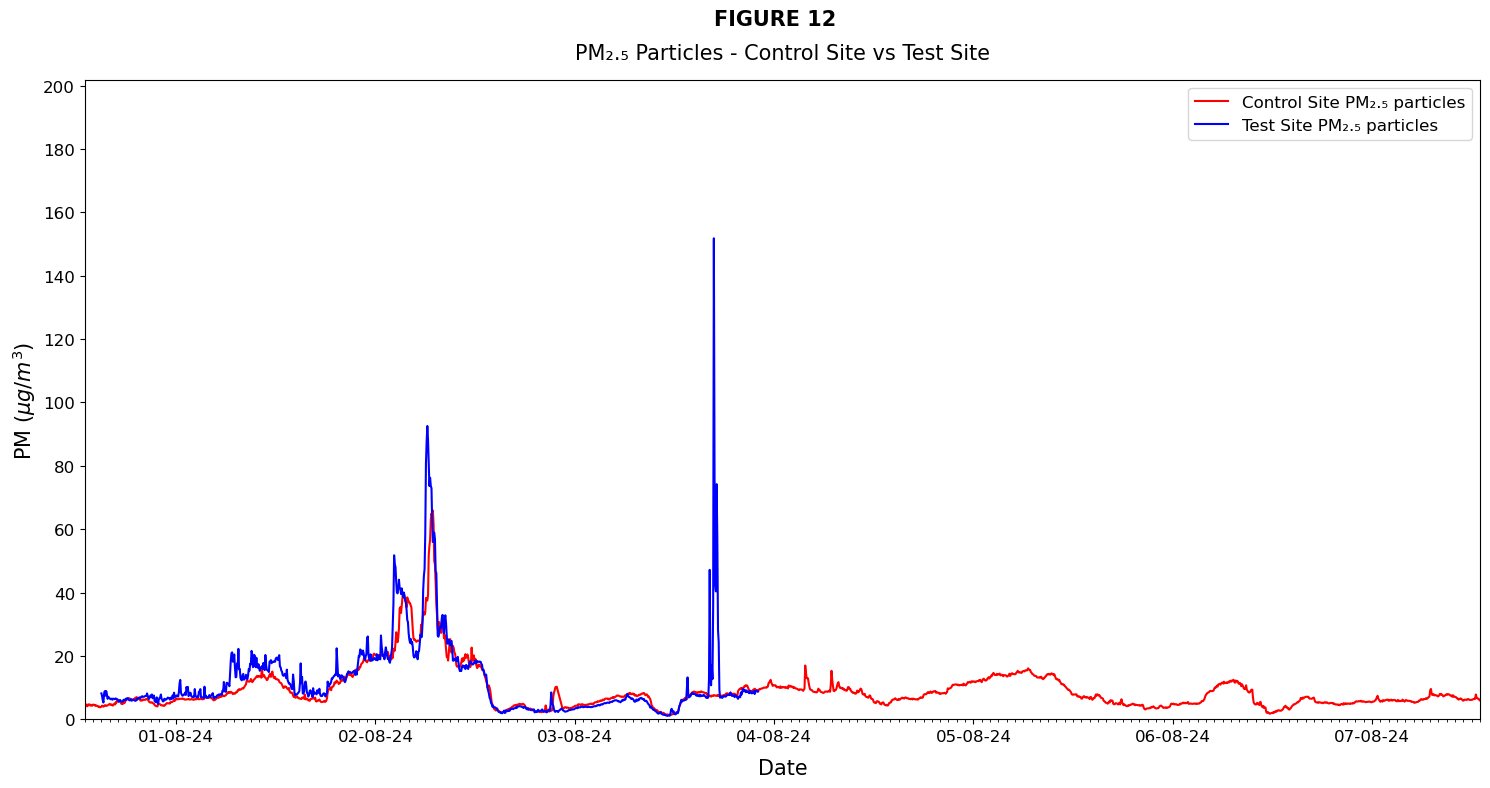

In [222]:
folder_paths = [
    '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site',
    '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site'
]

# Separate dataframes for each directory
dfs = {folder_paths[0]: [], folder_paths[1]: []}

# Loop through all folders and subfolders
for folder_path in folder_paths:
    #print(f"Checking folder: {folder_path}")  # Debugging statement
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.xlsx'):
                file_path = os.path.join(root, file_name)
                #print(f"Reading file: {file_path}")  # Debugging statement
                df = pd.read_excel(file_path, engine='openpyxl')
                df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
                dfs[folder_path].append(df)
                #print(f"DataFrame shape: {df.shape}")

# Combine all dataframes for each directory
combined_dfs = {}
for folder_path in folder_paths:
    combined_dfs[folder_path] = pd.concat(dfs[folder_path], ignore_index=True)
    #print(f"Combined DataFrame shape for {folder_path}: {combined_dfs[folder_path].shape}")

    # Drop rows with invalid dates and remove duplicates
    combined_dfs[folder_path] = combined_dfs[folder_path].dropna(subset=['Date Time'])
    combined_dfs[folder_path] = combined_dfs[folder_path].drop_duplicates(subset=['Date Time'])

    # Sort by date
    combined_dfs[folder_path] = combined_dfs[folder_path].sort_values(by='Date Time')

# Plot the data
plt.figure(figsize=(15, 8))

# Plot Control Site
#plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM10 particles (ug/m^3)'], label='Control Site PM₁₀ particles', color="r")
plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM2.5 particles (ug/m^3)'], label='Control Site PM₂.₅ particles', color="r")
#plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM1 particles (ug/m^3)'], label='Control Site PM₁ particles', color="y")

# Plot Test Site
#plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM10 particles (ug/m^3)'], label='Test Site PM₁₀ particles', color="b")
plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM2.5 particles (ug/m^3)'], label='Test Site PM₂.₅ particles', color="b")
#plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM1 particles (ug/m^3)'], label='Test Site PM₁ particles', color="m")

# Axis Labels
plt.title('PM₂.₅ Particles - Control Site vs Test Site', fontsize=15, pad=15)
plt.suptitle('FIGURE 12', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# x & y axis limits to zoom in on the data
plt.xlim(min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()),
         min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()) + pd.Timedelta(days=7))
plt.ylim(0, max(combined_dfs[folder_paths[0]]['PM2.5 particles (ug/m^3)'].max(), combined_dfs[folder_paths[1]]['PM2.5 particles (ug/m^3)'].max()) + 50)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))


plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1200))

# plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_12', dpi=300)

plt.tight_layout()
plt.show()

# PM1 Control vs Test Site:

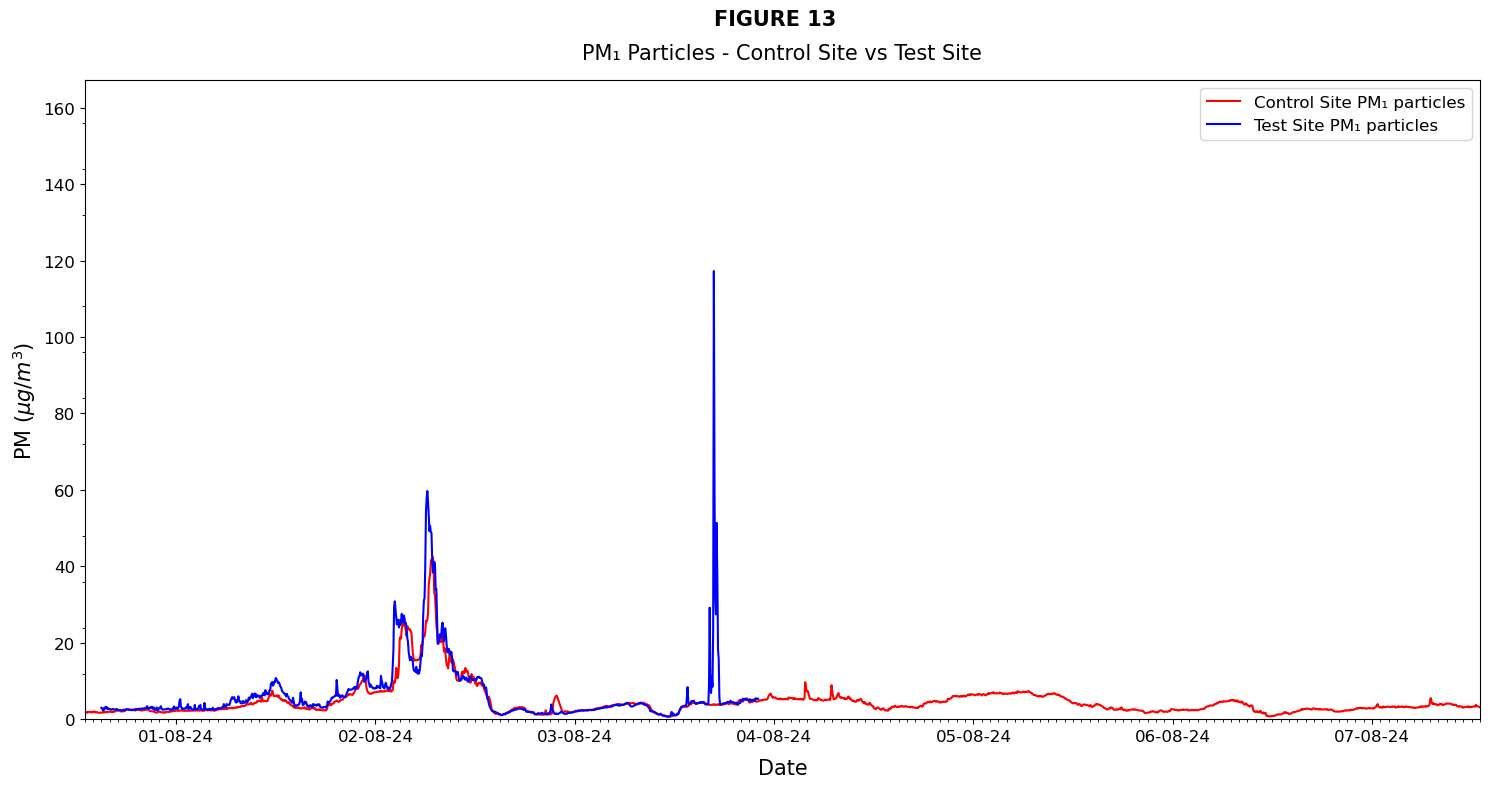

In [223]:
folder_paths = [
    '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site',
    '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site'
]

# Separate dataframes for each directory
dfs = {folder_paths[0]: [], folder_paths[1]: []}

# Loop through all folders and subfolders
for folder_path in folder_paths:
    #print(f"Checking folder: {folder_path}")  # Debugging statement
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.xlsx'):
                file_path = os.path.join(root, file_name)
                #print(f"Reading file: {file_path}")  # Debugging statement
                df = pd.read_excel(file_path, engine='openpyxl')
                df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
                dfs[folder_path].append(df)
                #print(f"DataFrame shape: {df.shape}")

# Combine all dataframes for each directory
combined_dfs = {}
for folder_path in folder_paths:
    combined_dfs[folder_path] = pd.concat(dfs[folder_path], ignore_index=True)
    #print(f"Combined DataFrame shape for {folder_path}: {combined_dfs[folder_path].shape}")

    # Drop rows with invalid dates and remove duplicates
    combined_dfs[folder_path] = combined_dfs[folder_path].dropna(subset=['Date Time'])
    combined_dfs[folder_path] = combined_dfs[folder_path].drop_duplicates(subset=['Date Time'])

    # Sort by date
    combined_dfs[folder_path] = combined_dfs[folder_path].sort_values(by='Date Time')

# Plot the data
plt.figure(figsize=(15, 8))

# Plot Control Site
#plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM10 particles (ug/m^3)'], label='Control Site PM₁₀ particles', color="r")
#plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM2.5 particles (ug/m^3)'], label='Control Site PM₂.₅ particles', color="r")
plt.plot(combined_dfs[folder_paths[0]]['Date Time'], combined_dfs[folder_paths[0]]['PM1 particles (ug/m^3)'], label='Control Site PM₁ particles', color="r")

# Plot Test Site
#plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM10 particles (ug/m^3)'], label='Test Site PM₁₀ particles', color="b")
#plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM2.5 particles (ug/m^3)'], label='Test Site PM₂.₅ particles', color="b")
plt.plot(combined_dfs[folder_paths[1]]['Date Time'], combined_dfs[folder_paths[1]]['PM1 particles (ug/m^3)'], label='Test Site PM₁ particles', color="b")

# Axis Labels
plt.title('PM₁ Particles - Control Site vs Test Site', fontsize=15, pad=15)
plt.suptitle('FIGURE 13', fontweight='bold', fontsize=15,x=0.52, y=0.98)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('PM ($μg/m^{3}$)', fontsize=15)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# x & y axis limits to zoom in on the data
plt.xlim(min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()),
         min(combined_dfs[folder_paths[0]]['Date Time'].min(), combined_dfs[folder_paths[1]]['Date Time'].min()) + pd.Timedelta(days=7))
plt.ylim(0, max(combined_dfs[folder_paths[0]]['PM1 particles (ug/m^3)'].max(), combined_dfs[folder_paths[1]]['PM1 particles (ug/m^3)'].max()) + 50)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))


plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(12))

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_13', dpi=300)

plt.tight_layout()
plt.show()

# PM10 PM5 PM1 over 14 days in one line - Control Site:

# PM10 PM5 PM1 over 14 days in one line - Test Site:

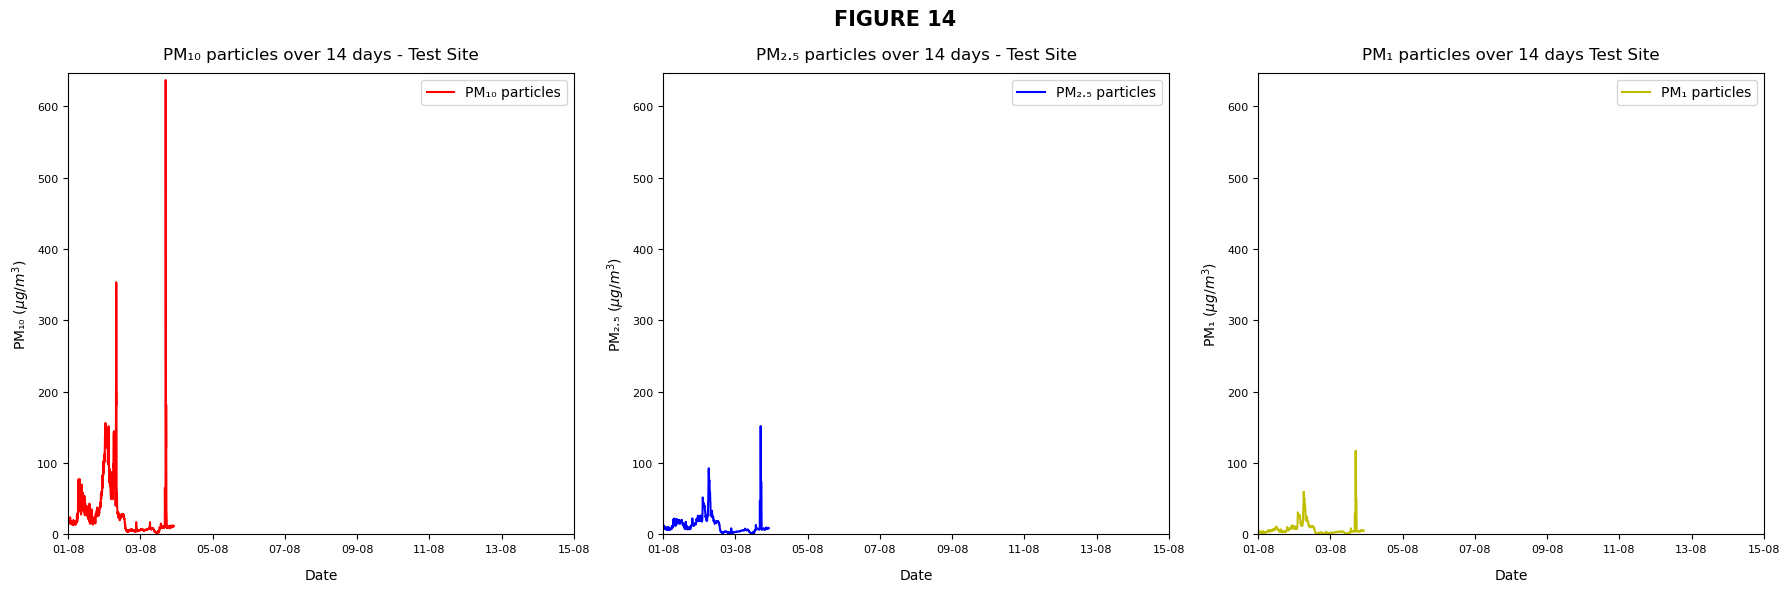

In [63]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PM10
axs[0].plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
axs[0].set_title('PM₁₀ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=14))
axs[0].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM2.5
axs[1].plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
axs[1].set_title('PM₂.₅ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=10)
axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=14))
axs[1].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM1
axs[2].plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
axs[2].set_title('PM₁ particles over 14 days Test Site', fontsize=12, pad=10)
axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=14))
axs[2].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.suptitle('FIGURE 14', fontweight='bold', fontsize=15,x=0.5, y=0.98)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_14', dpi=300)

plt.show()

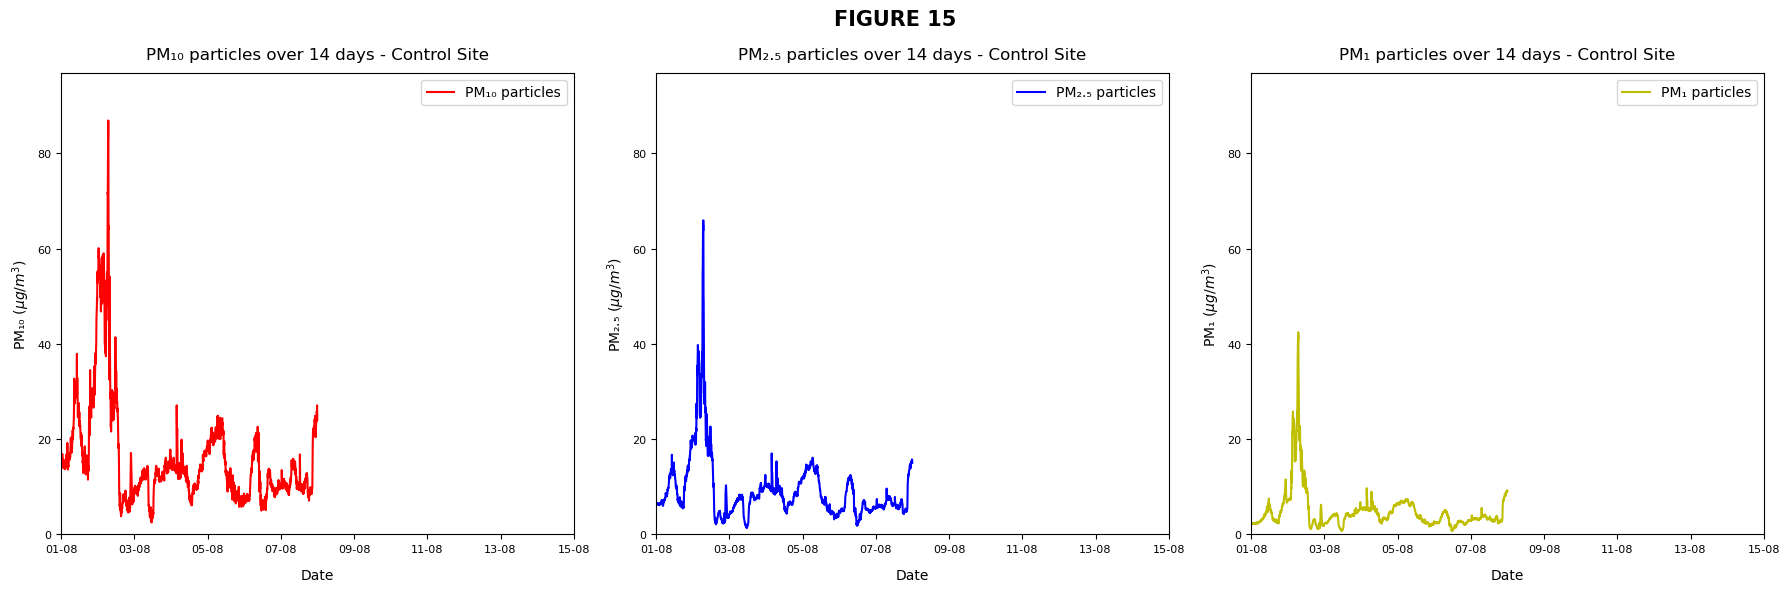

In [64]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot PM10
axs[0].plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
axs[0].set_title('PM₁₀ particles over 14 days - Control Site', fontsize=12, pad=10)
axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=14))
axs[0].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM2.5
axs[1].plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
axs[1].set_title('PM₂.₅ particles over 14 days - Control Site', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=10)
axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=14))
axs[1].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Plot PM1
axs[2].plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
axs[2].set_title('PM₁ particles over 14 days - Control Site', fontsize=12, pad=10)
axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=14))
axs[2].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.suptitle('FIGURE 15', fontweight='bold', fontsize=15,x=0.5, y=0.98)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_15', dpi=300)

plt.show()

# PM10 PM2.5 PM1 day by day over 14 days - Control Site:

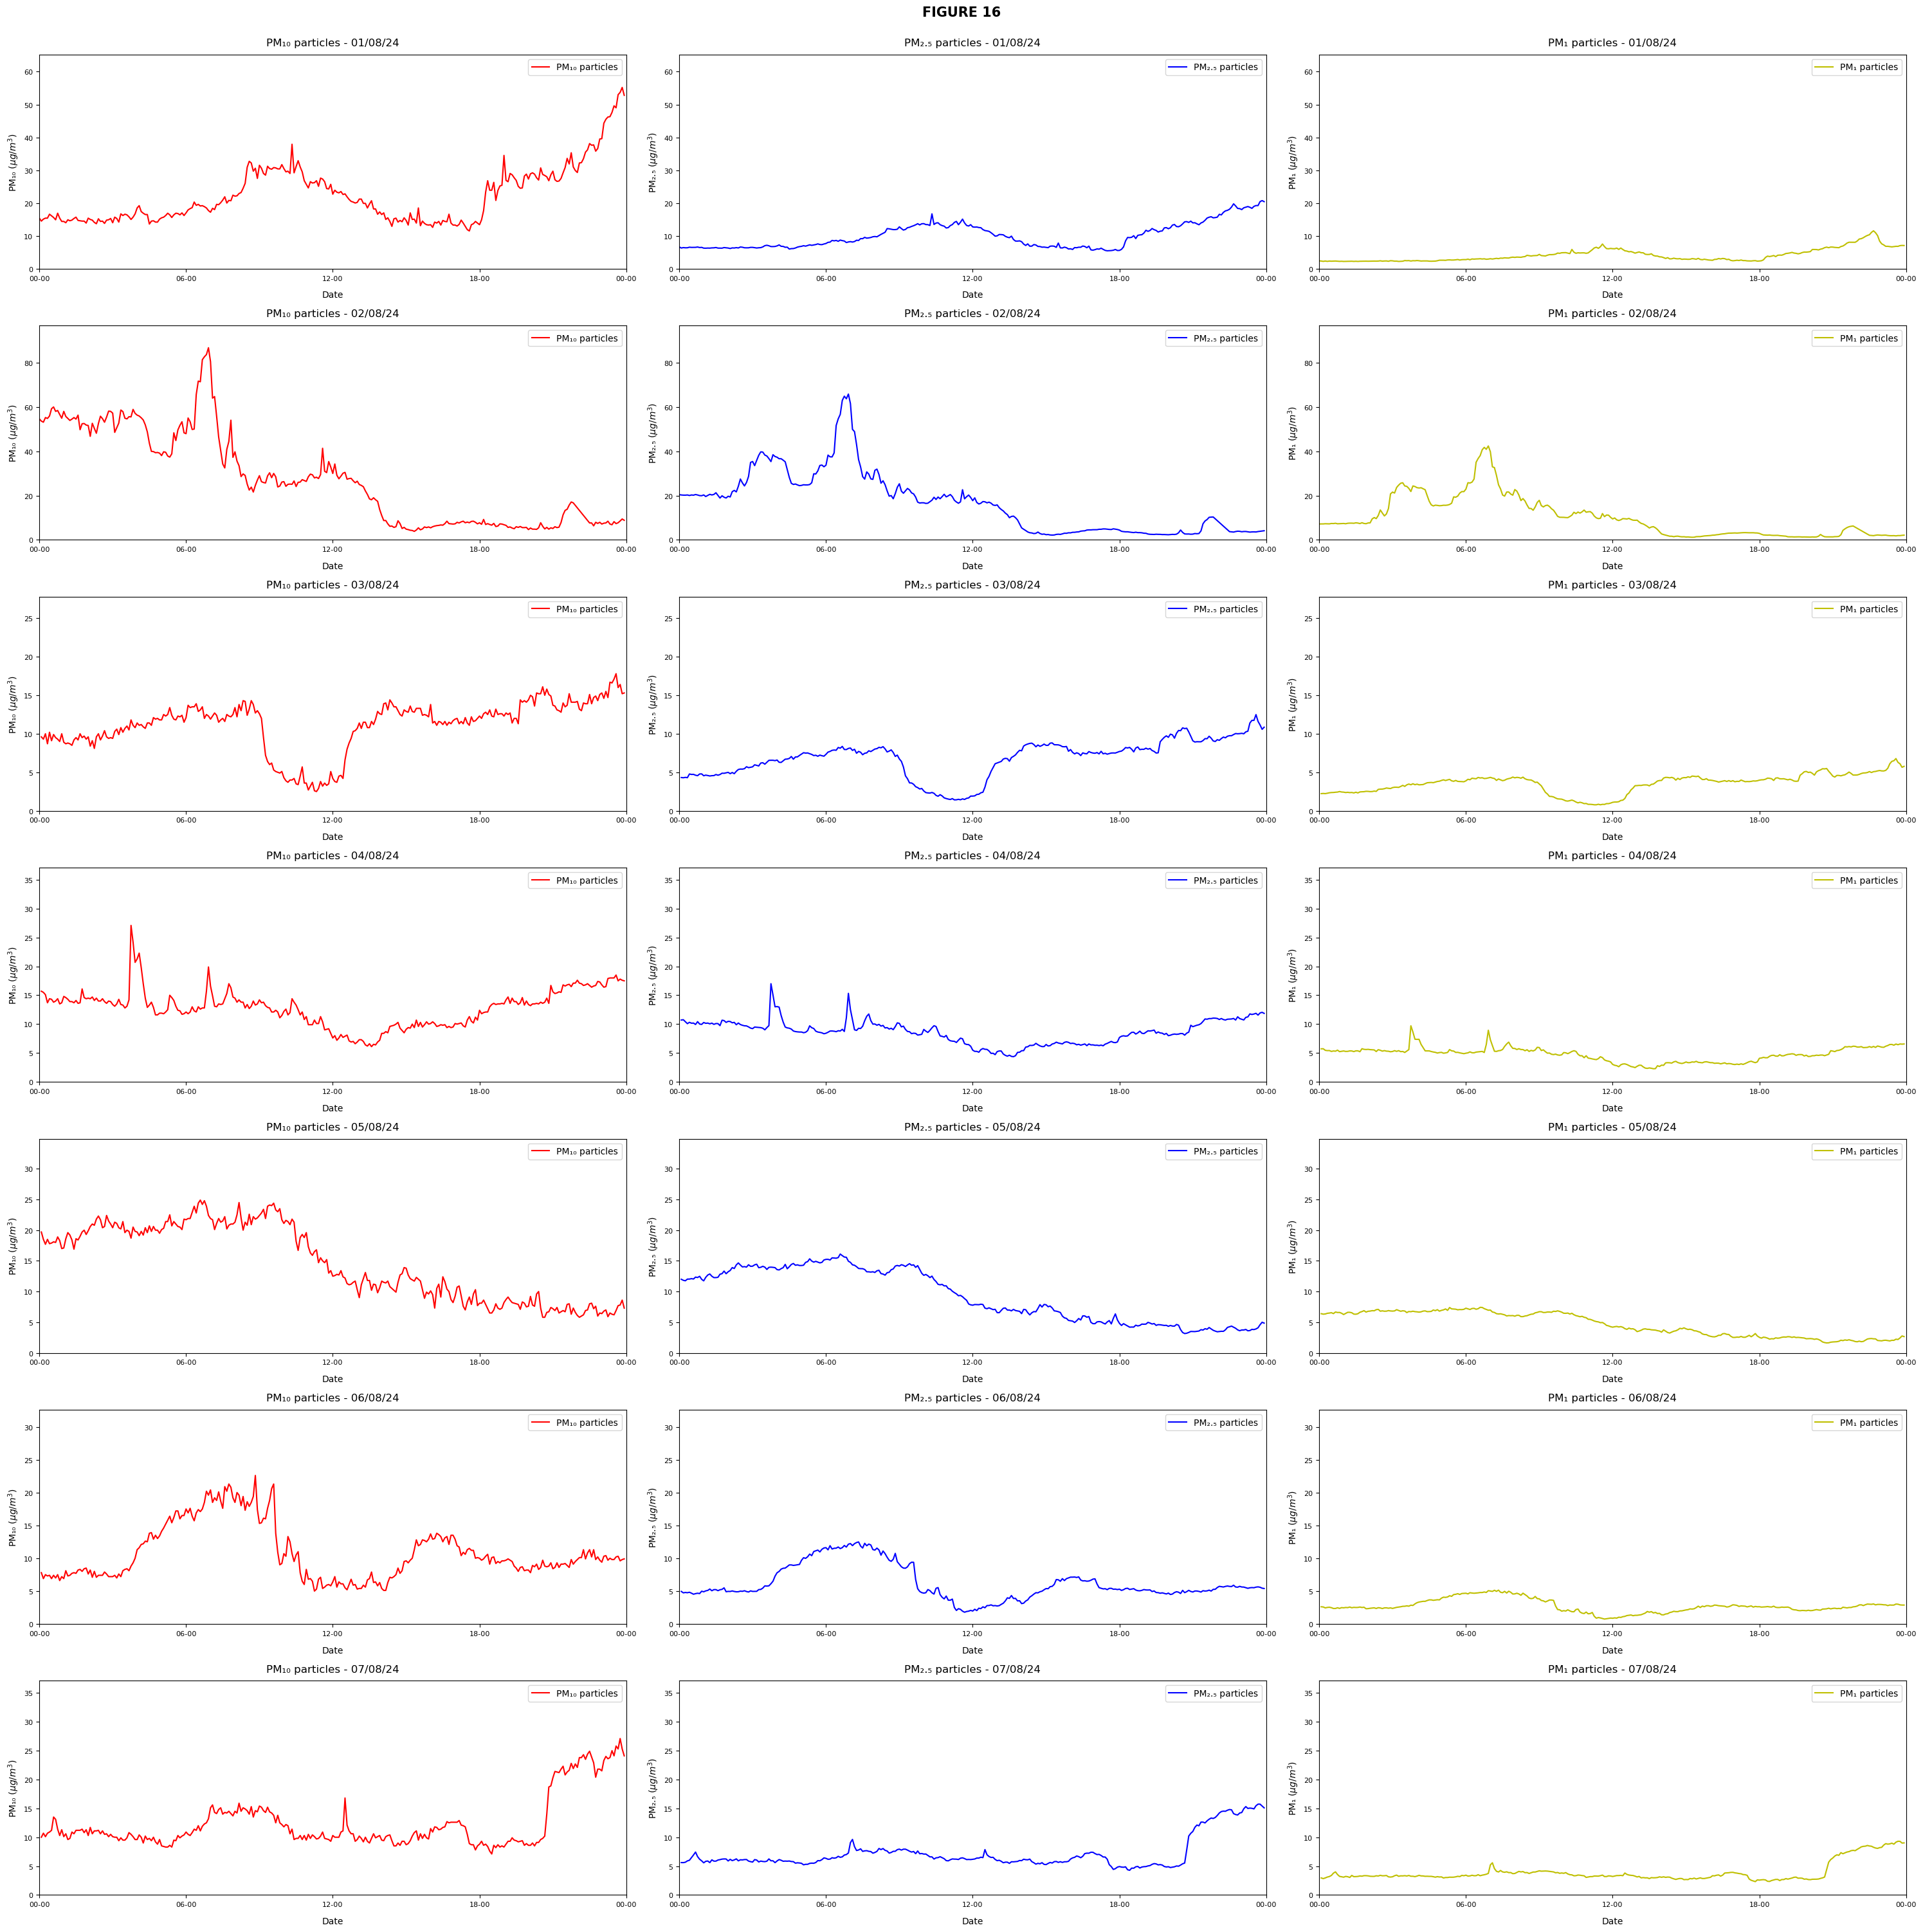

In [68]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])
combined_df = combined_df.sort_values(by='Date Time')

#fig, axs = plt.subplots(14, 3, figsize=(18, 84))
fig, axs = plt.subplots(7, 3, figsize=(30, 30))

# Loop through each day and create plots
for i in range(14):
    start_time = combined_df['Date Time'].min() + pd.Timedelta(days=i)
    end_time = start_time + pd.Timedelta(days=1)
    day_df = combined_df[(combined_df['Date Time'] >= start_time) & (combined_df['Date Time'] < end_time)]

    if not day_df.empty:
        date_str = start_time.strftime('%d/%m/%y')

        # Plot PM10
        axs[i, 0].plot(day_df['Date Time'], day_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
        axs[i, 0].set_title(f'PM₁₀ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 0].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
        axs[i, 0].legend(fontsize=10)
        axs[i, 0].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 0].set_xlim(start_time, end_time)
        axs[i, 0].set_ylim(0, day_df['PM10 particles (ug/m^3)'].max() + 10)
        axs[i, 0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM2.5
        axs[i, 1].plot(day_df['Date Time'], day_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
        axs[i, 1].set_title(f'PM₂.₅ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 1].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
        axs[i, 1].legend(fontsize=10)
        axs[i, 1].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 1].set_xlim(start_time, end_time)
        axs[i, 1].set_ylim(0, day_df['PM10 particles (ug/m^3)'].max() + 10)
        axs[i, 1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM1
        axs[i, 2].plot(day_df['Date Time'], day_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
        axs[i, 2].set_title(f'PM₁ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 2].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
        axs[i, 2].legend(fontsize=10)
        axs[i, 2].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 2].set_xlim(start_time, end_time)
        axs[i, 2].set_ylim(0, day_df['PM10 particles (ug/m^3)'].max() + 10)
        axs[i, 2].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 2].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))
        
plt.suptitle('FIGURE 16', fontweight='bold', fontsize=15,x=0.5, y=1)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_16', dpi=700)

plt.show()

# PM10 PM2.5 PM1 day by day over 14 days - Test Site:

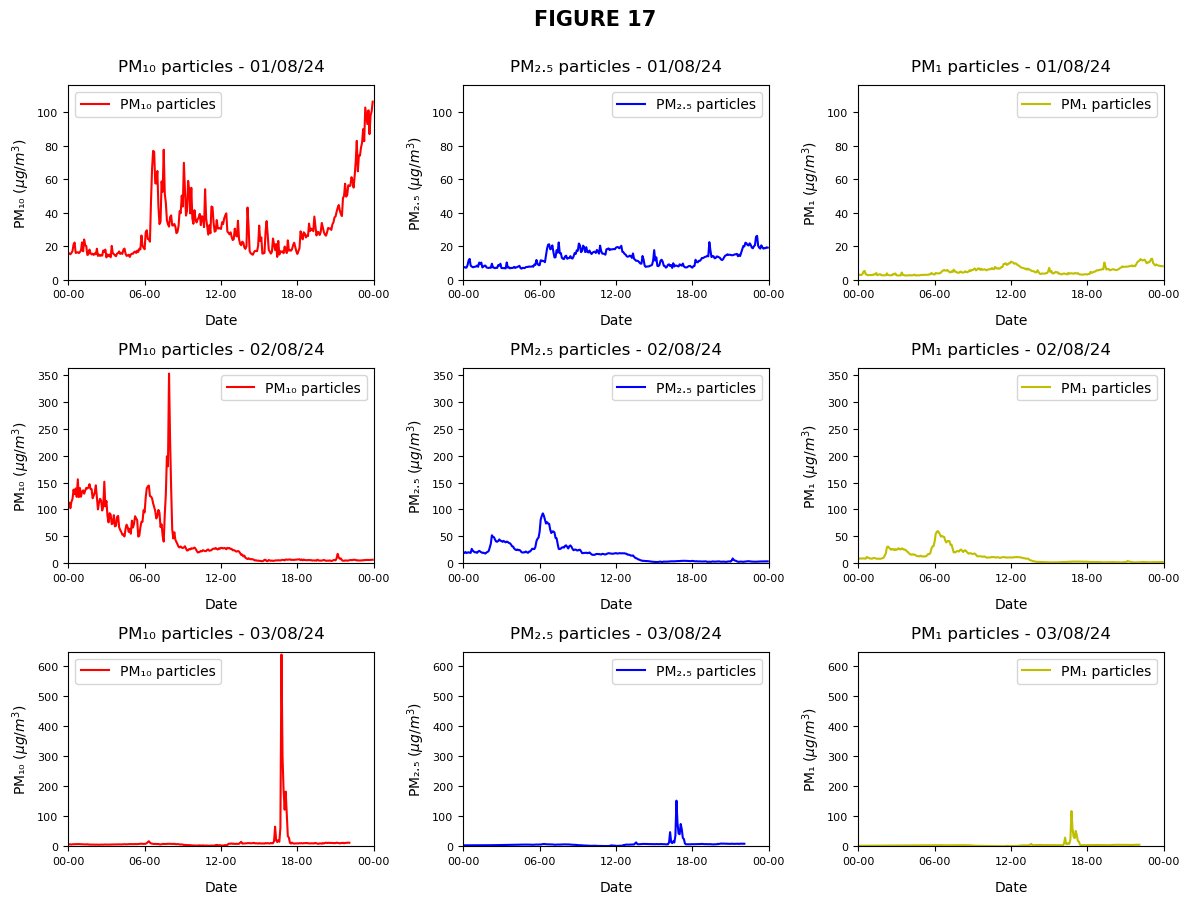

In [66]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])
combined_df = combined_df.sort_values(by='Date Time')

#fig, axs = plt.subplots(14, 3, figsize=(18, 84)) - for sqaure layout
fig, axs = plt.subplots(3, 3, figsize=(12, 9)) #- for export

# Loop through each day and create plots
for i in range(14):
    start_time = combined_df['Date Time'].min() + pd.Timedelta(days=i)
    end_time = start_time + pd.Timedelta(days=1)
    day_df = combined_df[(combined_df['Date Time'] >= start_time) & (combined_df['Date Time'] < end_time)]

    if not day_df.empty:
        date_str = start_time.strftime('%d/%m/%y')

        # Plot PM10
        axs[i, 0].plot(day_df['Date Time'], day_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
        axs[i, 0].set_title(f'PM₁₀ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 0].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
        axs[i, 0].legend(fontsize=10)
        axs[i, 0].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 0].set_xlim(start_time, end_time)
        axs[i, 0].set_ylim(0, day_df['PM10 particles (ug/m^3)'].max() + 10)
        axs[i, 0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM2.5
        axs[i, 1].plot(day_df['Date Time'], day_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
        axs[i, 1].set_title(f'PM₂.₅ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 1].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
        axs[i, 1].legend(fontsize=10)
        axs[i, 1].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 1].set_xlim(start_time, end_time)
        axs[i, 1].set_ylim(0, day_df['PM10 particles (ug/m^3)'].max() + 10)
        axs[i, 1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM1
        axs[i, 2].plot(day_df['Date Time'], day_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
        axs[i, 2].set_title(f'PM₁ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 2].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
        axs[i, 2].legend(fontsize=10)
        axs[i, 2].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 2].set_xlim(start_time, end_time)
        axs[i, 2].set_ylim(0, day_df['PM10 particles (ug/m^3)'].max() + 10)
        axs[i, 2].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 2].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

plt.suptitle('FIGURE 17', fontweight='bold', fontsize=15,x=0.5, y=1)


plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_17', dpi=300)

plt.show()

# PM10 PM2.5 PM1 Control vs Test Site over 14 days:

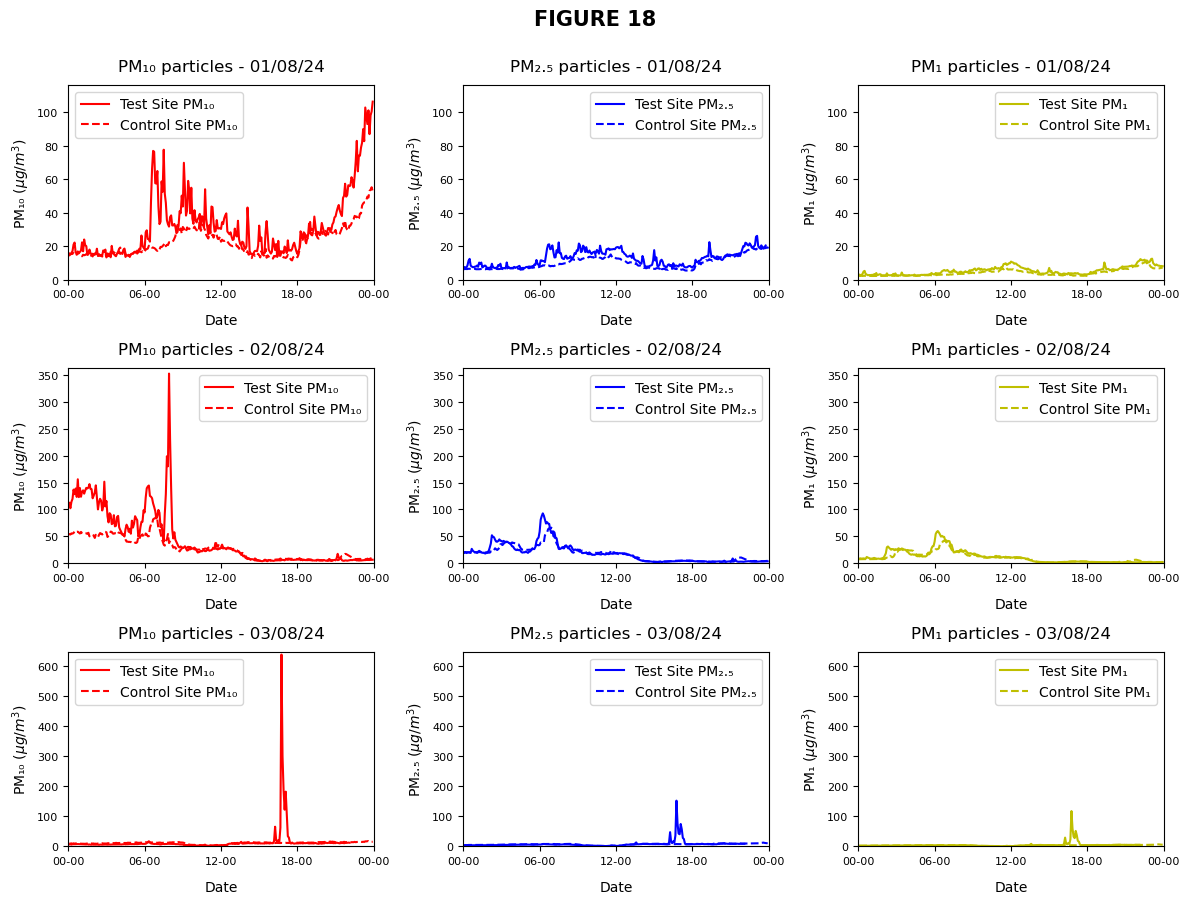

In [67]:
test_site_dir = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Test Site'
control_site_dir = '/Users/ahmad/Documents/NERC Internship/Excel/Actual Data/Dust_together/Control Site'

# Read files and put into a single df
def read_data_from_directory(directory):
    dfs = []
    for file_name in os.listdir(directory):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_excel(file_path, engine='openpyxl')
            df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
            dfs.append(df)
    combined_df = pd.concat(dfs)
    combined_df = combined_df.dropna(subset=['Date Time'])
    combined_df = combined_df.drop_duplicates(subset=['Date Time'])
    return combined_df.sort_values(by='Date Time')

# Read data from both directories
test_site_df = read_data_from_directory(test_site_dir)
control_site_df = read_data_from_directory(control_site_dir)

# fig, axs = plt.subplots(14, 3, figsize=(18, 84))
fig, axs = plt.subplots(3, 3, figsize=(12, 9)) #- for export

# Loop through each day and create comparison plots
for i in range(14):
    start_time = min(test_site_df['Date Time'].min(), control_site_df['Date Time'].min()) + pd.Timedelta(days=i)
    end_time = start_time + pd.Timedelta(days=1)
    
    # Filter data for the current day
    test_day_df = test_site_df[(test_site_df['Date Time'] >= start_time) & (test_site_df['Date Time'] < end_time)]
    control_day_df = control_site_df[(control_site_df['Date Time'] >= start_time) & (control_site_df['Date Time'] < end_time)]

    if not test_day_df.empty and not control_day_df.empty:
        date_str = start_time.strftime('%d/%m/%y')

        # Plot PM10
        axs[i, 0].plot(test_day_df['Date Time'], test_day_df['PM10 particles (ug/m^3)'], label='Test Site PM₁₀', color="r")
        axs[i, 0].plot(control_day_df['Date Time'], control_day_df['PM10 particles (ug/m^3)'], label='Control Site PM₁₀', color="r", linestyle='--')
        axs[i, 0].set_title(f'PM₁₀ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 0].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
        axs[i, 0].legend(fontsize=10)
        axs[i, 0].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 0].set_xlim(start_time, end_time)
        axs[i, 0].set_ylim(0, max(test_day_df['PM10 particles (ug/m^3)'].max(), control_day_df['PM10 particles (ug/m^3)'].max()) + 10)
        axs[i, 0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM2.5
        axs[i, 1].plot(test_day_df['Date Time'], test_day_df['PM2.5 particles (ug/m^3)'], label='Test Site PM₂.₅', color="b")
        axs[i, 1].plot(control_day_df['Date Time'], control_day_df['PM2.5 particles (ug/m^3)'], label='Control Site PM₂.₅', color="b", linestyle='--')
        axs[i, 1].set_title(f'PM₂.₅ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 1].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
        axs[i, 1].legend(fontsize=10)
        axs[i, 1].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 1].set_xlim(start_time, end_time)
        axs[i, 1].set_ylim(0, max(test_day_df['PM10 particles (ug/m^3)'].max(), control_day_df['PM10 particles (ug/m^3)'].max()) + 10)
        axs[i, 1].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

        # Plot PM1
        axs[i, 2].plot(test_day_df['Date Time'], test_day_df['PM1 particles (ug/m^3)'], label='Test Site PM₁', color="y")
        axs[i, 2].plot(control_day_df['Date Time'], control_day_df['PM1 particles (ug/m^3)'], label='Control Site PM₁', color="y", linestyle='--')
        axs[i, 2].set_title(f'PM₁ particles - {date_str}', fontsize=12, pad=10)
        axs[i, 2].set_xlabel('Date', fontsize=10, labelpad=10)
        axs[i, 2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
        axs[i, 2].legend(fontsize=10)
        axs[i, 2].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 2].set_xlim(start_time, end_time)
        axs[i, 2].set_ylim(0, max(test_day_df['PM10 particles (ug/m^3)'].max(), control_day_df['PM10 particles (ug/m^3)'].max()) + 10)
        axs[i, 2].xaxis.set_major_locator(mdates.HourLocator(interval=6))
        axs[i, 2].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))
        
plt.suptitle('FIGURE 18', fontweight='bold', fontsize=15,x=0.5, y=1)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_18', dpi=300)

plt.show()